<h3>Práctica de Overfitting</h3>
Para este ejercicio se utilizó el "Car Evaluation Data Set": https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
Este conjunto de datos contiene 1728 observaciones con 6 atributos y 4 categorías. Los valores de los atributos representan características de los automóviles para su evaluación (unnac, acc, good, v-good), tales como:
<pre>
   buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high
</pre>   
Tanto los valores de las clases como de los atributos fueron converidos a numérico en [1-4]. Las clases se encuentran desbalanceadas en cuanto a la cantidad de observaciones, tal como:
<pre>
   class      N          N[%]
   -----------------------------
   unacc     1210     (70.023 %) 
   acc        384     (22.222 %) 
   good        69     ( 3.993 %) 
   v-good      65     ( 3.762 %)
</pre>   

Luego de procesado el archivo, se carga al array data[]

In [2]:
data = []
with open("car.data.csv", "r") as fin:
    for line in fin:
        data.append(line.strip().split(","))

Se pasa a un array de numpy (para extraer las columnas) y se separan los atributos de las clases correspondientes (targets)

In [3]:
import numpy as np

np_data = np.asarray(data).astype('int')
targets_data = np_data[:,6]
x_data = np_data[:,0:6]

Usando el módulo 'cross validation' se separa en dos conjuntos de 'train' y 'test' en una proporción 70-30 respectivamente.

In [4]:
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(x_data, targets_data, test_size=0.3, random_state=0)

In [5]:
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(1209, 6) (1209,) (519, 6) (519,)


Se entrena un clasificador (árbol) sin limites

In [6]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [7]:
print clf.tree_.node_count

135


In [8]:
print("Score train: %f" % clf.score(X_train, y_train))

Score train: 1.000000


Se testea la performance con el dataset de 'test'

In [9]:
print("Score test: %f" %clf.score(X_test, y_test))

Score test: 0.978805


In [11]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=20)
clf=clf.fit(X_train, y_train)
print("Score train: %f" % clf.score(X_train, y_train))
print("Score test: %f" % clf.score(X_test, y_test))

Score train: 0.956162
Score test: 0.932563


Se itera sobre la cantidad de nodos máxima requerida testeando la performance con ambos datasets.

In [13]:
xdata1 = []
yserie1 = []
yserie2 = []
for i in range(2,70,1):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=i).fit(X_train, y_train)
    
    xdata1.append(clf.tree_.node_count)
    yserie1.append(clf.score(X_train, y_train))
    yserie2.append(clf.score(X_test,y_test))

Se grafican las series del paso anterior ('rojo': train set. 'azul': test set). <br>
Eje-x: Cantidad de nodos máxima del árbol<br>
Eje-y: Performance (score)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


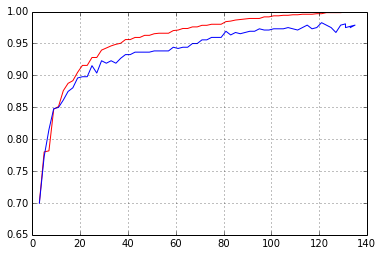

In [14]:
%pylab inline
plot(xdata1, yserie1, color='r')
plot(xdata1, yserie2, color='b')
grid('on')

Se introduce ruido en el 10% del conjunto de entrenamiento y se repiten las operaciones.

In [ ]:
noise_idx = random.random(y_train.shape)
y_train_with_noise = y_train.copy()
y_train_with_noise[noise_idx<0.1] = floor(y_train_with_noise[noise_idx<0.1] - 1) * (-1)

In [ ]:
xdata1 = []
yserie1 = []
yserie2 = []
for i in range(2,70,1):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=i).fit(X_train, y_train_with_noise)
    xdata1.append(clf.tree_.node_count)
    yserie1.append(clf.score(X_train, y_train_with_noise))
    yserie2.append(clf.score(X_test,y_test))

In [ ]:
#%pylab inline
plot(xdata1, yserie1, color='r')
plot(xdata1, yserie2, color='b')
grid('on')

Se introduce ruido en el 30% del conjunto de entrenamiento y se repiten las operaciones.

In [ ]:
noise_idx = random.random(y_train.shape)
y_train_with_noise = y_train.copy()
y_train_with_noise[noise_idx<0.3] = floor(y_train_with_noise[noise_idx<0.3] - 1) * (-1)

In [ ]:
xdata1 = []
yserie1 = []
yserie2 = []
for i in range(2,70,1):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=i).fit(X_train, y_train_with_noise)
    xdata1.append(clf.tree_.node_count)
    yserie1.append(clf.score(X_train, y_train_with_noise))
    yserie2.append(clf.score(X_test,y_test))

In [ ]:
#%pylab inline
plot(xdata1, yserie1, color='r')
plot(xdata1, yserie2, color='b')
grid('on')

Se introduce ruido en el 50% del conjunto de entrenamiento y se repiten las operaciones.

In [ ]:
noise_idx = random.random(y_train.shape)
y_train_with_noise = y_train.copy()
y_train_with_noise[noise_idx<0.5] = floor(y_train_with_noise[noise_idx<0.5] - 1) * (-1)

In [ ]:
xdata1 = []
yserie1 = []
yserie2 = []
for i in range(2,70,1):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=i).fit(X_train, y_train_with_noise)
    xdata1.append(clf.tree_.node_count)
    yserie1.append(clf.score(X_train, y_train_with_noise))
    yserie2.append(clf.score(X_test,y_test))

In [ ]:
#%pylab inline
plot(xdata1, yserie1, color='r')
plot(xdata1, yserie2, color='b')
grid('on')

Se introduce ruido en el 80% del conjunto de entrenamiento y se repiten las operaciones.

In [ ]:
noise_idx = random.random(y_train.shape)
y_train_with_noise = y_train.copy()
y_train_with_noise[noise_idx<0.8] = floor(y_train_with_noise[noise_idx<0.8] - 1) * (-1)

In [ ]:
xdata1 = []
yserie1 = []
yserie2 = []
for i in range(2,70,1):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=i).fit(X_train, y_train_with_noise)
    xdata1.append(clf.tree_.node_count)
    yserie1.append(clf.score(X_train, y_train_with_noise))
    yserie2.append(clf.score(X_test,y_test))

In [ ]:
#%pylab inline
plot(xdata1, yserie1, color='r')
plot(xdata1, yserie2, color='b')
grid('on')